In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Er wordt gesplitst op verschillende leeftijdsgroepen, ook wordt er meteen gesorteerd op overlevende om de grafiek zometeen makkelijker te kunnen maken

In [135]:
df_young_survived = df_train[(df_train['Age'] < 20) & (df_train['Survived'] == 1)].count()
df_young_died = df_train[(df_train['Age'] < 20) & (df_train['Survived'] == 0)].count()

df_20p_survived = df_train[(df_train["Age"] <= 30) & (df_train["Age"] >= 20) & (df_train['Survived'] == 1)].count()
df_20p_died = df_train[(df_train["Age"] <= 30) & (df_train["Age"] >= 20) & (df_train['Survived'] == 0)].count()

df_30p_survived = df_train[(df_train["Age"] < 40) & (df_train["Age"] >= 30)& (df_train['Survived'] == 1)].count()
df_30p_died = df_train[(df_train["Age"] < 40) & (df_train["Age"] >= 30)& (df_train['Survived'] == 0)].count()

df_40p_survived = df_train[(df_train["Age"] <50 ) & (df_train["Age"] >= 40)& (df_train['Survived'] == 1)].count()
df_40p_died = df_train[(df_train["Age"] <50 ) & (df_train["Age"] >= 40)& (df_train['Survived'] == 0)].count()

df_O_survived = df_train[(df_train['Age'] > 50 ) & (df_train['Survived'] == 1)].count()
df_O_died = df_train[(df_train['Age'] > 50) & (df_train['Survived'] == 0)].count()

df_NaN_survived = df_train[(df_train.Age.isnull())  & (df_train['Survived'] == 1)].count()
df_NaN_died = df_train[(df_train.Age.isnull())  & (df_train['Survived'] == 0)].count()


## Hieronder wordt  er eerst een ruw databestand aangemaakt en vervolgens omgezet naar een dataframe die gebruikt gaat worden binnen matplotlib

In [142]:
raw_data ={
    'ageclasses': ['young', '20-30', '30-40', '40-50', '50+','Age Not Available'],
    'survived': [df_young_survived.Survived , df_20p_survived.Survived , df_30p_survived.Survived , df_40p_survived.Survived , df_O_survived.Survived , df_NaN_survived.Survived],
    'died': [df_young_died.Survived , df_20p_died.Survived , df_30p_died.Survived , df_40p_died.Survived , df_O_died.Survived , df_NaN_died.Survived]
}

df_survivors = pd.DataFrame(raw_data, columns=['survived', 'died'])


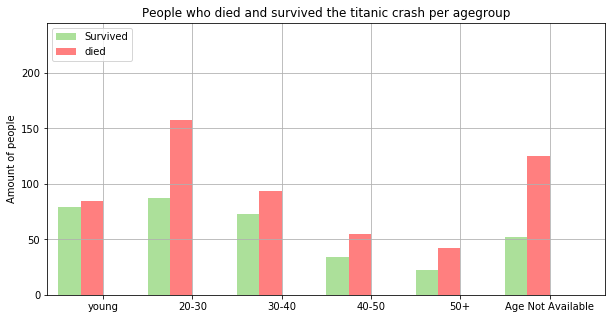

In [144]:
pos = list(range(len(df_survivors['died'])))
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos,
        df_survivors['survived'],
        width,
        alpha=0.5,
        color='#5BC236',
        label=raw_data['ageclasses'][0])
plt.bar([p + width for p in pos],
        df_survivors['died'],
        width,
        alpha=0.5,
        color='#FF0000',
        label=raw_data['ageclasses'][1])

# Set the y axis label
ax.set_ylabel('Amount of people')

# Set the chart's title
ax.set_title('People who died and survived the titanic crash per agegroup')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(raw_data['ageclasses'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df_survivors['survived'] + df_survivors['died'])] )

# Adding the legend and showing the plot
plt.legend(['Survived', 'died'], loc='upper left')
plt.grid()
plt.show()

## In bovenstaand diagram is te zien dat de meeste bezoekers tussen de leeftijd 20-30 jaar ligt.  Ook is te zien dat het verschil tussen overlevende en doden bij mensen onder de 20 jaar het kleinst is.